# European Swaption Pricing - All Models

Value a European Swaption using the Hull-White, Black-Derman-Toy and Black-Karasinski models. I analyse relationships to test the model pricing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.libor import *
from financepy.market.curves import *
from financepy.models.FinModelRatesHW import FinModelRatesHW
from financepy.models.FinModelRatesBK import FinModelRatesBK
from financepy.models.FinModelRatesBDT import FinModelRatesBDT

###################################################################
# FINANCEPY BETA Version 0.180 - This build: 22 Sep 2020 at 19:38 #
#     This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy #
###################################################################



## Discount Curve

In [3]:
valuationDate = FinDate(1, 1, 2011)
settlementDate = valuationDate

Set up flat discount curve at 6% (semi-annual compounding)

In [4]:
liborCurve = FinDiscountCurveFlat(valuationDate, 0.0625, FinFrequencyTypes.SEMI_ANNUAL)

# Defining the Swaptions

We begin with European swaptions. European swaptions can be set up directly as European Swaptions or as Bermudan swaptions with an exercise type of EUROPEAN

In [5]:
exerciseDate = settlementDate.addTenor("1Y")
swapMaturityDate = settlementDate.addTenor("4Y")

swapFixedCoupon = 0.060
swapFixedFrequencyType = FinFrequencyTypes.SEMI_ANNUAL
swapFixedDayCountType = FinDayCountTypes.ACT_365F
swapType = FinLiborSwapTypes.PAYER 

In [6]:
exerciseDate

SUN 01 JAN 2012

In [7]:
swapMaturityDate

THU 01 JAN 2015

In [8]:
swaptionPay = FinLiborSwaption(settlementDate,
                               exerciseDate,
                               swapMaturityDate,
                               FinLiborSwapTypes.PAYER ,
                               swapFixedCoupon,
                               swapFixedFrequencyType,
                               swapFixedDayCountType)

In [9]:
swaptionRec = FinLiborSwaption(settlementDate,
                               exerciseDate,
                               swapMaturityDate,
                               FinLiborSwapTypes.RECEIVER,
                               swapFixedCoupon,
                               swapFixedFrequencyType,
                               swapFixedDayCountType)

## Valuation using Black's Model

Let's try the zero volatility limit first

In [10]:
model = FinModelBlack(0.00001)

In [11]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 6193.31147
Recvr Value:   0.00000
PayV - RecV: 6193.31147


We can value the forward starting swap.

In [12]:
swap = FinLiborSwap(exerciseDate,
                    swapMaturityDate,
                    swapType,
                    swapFixedCoupon,
                    swapFixedFrequencyType,
                    swapFixedDayCountType)

In [13]:
swapValue = swap.value(settlementDate, liborCurve, liborCurve)
print("Swap Value: %9.5f"% swapValue)

Swap Value: 6193.31147


At zero volatility the payer swaption is in the money and is just a forward starting swap so this makes sense.

Let's repeat with a non-zero volatility

In [18]:
model = FinModelBlack(0.20)

In [19]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 15721.54222
Recvr Value: 9528.23076
PayV - RecV: 6193.31147


The swaption values have changed. Put call parity keeps the difference equal to the value of the forward starting swap.

We can also value the European option using other models. Let's try Black-Karasinski.

## Valuation using Shifted Black Model

In [22]:
model = FinModelBlackShifted(0.00001, 0.002)

In [28]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 16118.34635
Recvr Value: 9925.03441
PayV - RecV: 6193.31194


In [26]:
model = FinModelBlackShifted(0.20, 0.002)

In [27]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 16118.34635
Recvr Value: 9925.03441
PayV - RecV: 6193.31194


Once again the model satisfies put-call parity.

## Valuation using Black-Karasinski

Start with the zero volatility limit

In [16]:
sigma = 0.00001
a = 0.01
numTimeSteps = 200
model = FinModelRatesBK(sigma, a, numTimeSteps)

In [17]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 6193.30557
Recvr Value:   0.00000
PayV - RecV: 6193.30557


Only the payer swaption is in the money and is worth the forward starting swap.

In [18]:
sigma = 0.20
a = 0.01
numTimeSteps = 200
model = FinModelRatesBK(sigma, a, numTimeSteps)

In [19]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 15633.19291
Recvr Value: 9439.88154
PayV - RecV: 6193.31138


At 20% volatility the values are higher but put-call parity is obeyed.

## Valuation using Black-Derman-Toy

Check the zero volatility limit

In [20]:
sigma = 0.00001
numTimeSteps = 200
model = FinModelRatesBDT(sigma, numTimeSteps)

In [21]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 6193.08206
Recvr Value:   0.00000
PayV - RecV: 6193.08206


Same result as before.

In [22]:
sigma = 0.20
numTimeSteps = 200
model = FinModelRatesBDT(sigma, numTimeSteps)

In [23]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 15895.53194
Recvr Value: 9698.75866
PayV - RecV: 6196.77328


At 20% volatility the values are higher but put-call parity is obeyed.

## Valuation using Hull-White Model

We do the zero volatility limit first.

In [24]:
sigma = 0.0000001
a = 0.01
numTimeSteps = 200
model = FinModelRatesHW(sigma, a)

This is analytical as it uses Jamshidians method.

In [25]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 6193.28350
Recvr Value:   0.00000
PayV - RecV: 6193.28350


This is as expected.

In [26]:
sigma = 0.01
a = 0.01
numTimeSteps = 200
model = FinModelRatesHW(sigma, a)

In [27]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 13629.34383
Recvr Value: 7436.17727
PayV - RecV: 6193.16656


Once again put-call parity is obeyed.

# Tree Convergence Testing

## BK Model

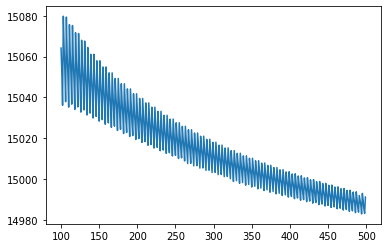

In [28]:
sigma = 0.2012
a = 0.04

timeSteps = range(100,500,1)
values = []
for numTimeSteps in timeSteps:
    model = FinModelRatesBK(sigma, a, numTimeSteps)
    v = swaptionPay.value(valuationDate, liborCurve, model)
    values.append(v)

plt.plot(timeSteps, values);

Averaging even and odd values will improve convergence.

## BDT Model

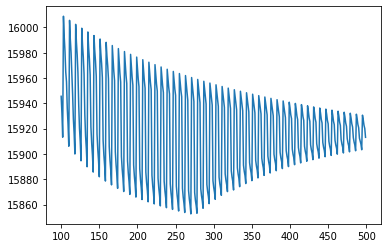

In [29]:
sigma = 0.2012

timeSteps = range(100,500,1)
values = []
for numTimeSteps in timeSteps:
    model = FinModelRatesBDT(sigma, numTimeSteps)
    v = swaptionPay.value(settlementDate, liborCurve, model)
    values.append(v)
    
plt.plot(timeSteps, values);

Averaging even and odd values will improve convergence.

Copyright (c) 2020 Dominic O'Kane